In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne numpy pandas scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.4 MB/s eta 0:00:00


In [ ]:
pip install mne numpy pandas scikit-learn matplotlib seaborn pyriemann

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mne.decoding import CSP
from mne.time_frequency import tfr_multitaper
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM
import plotly.express as px
import os

In [ ]:
DATADIR = '/content/drive/MyDrive/Files'
CATEGORIES = ['S001', 'S002','S003','S004','S005','S006','S007','S008','S009','S010',
              'S011','S012','S013','S014','S015','S016','S017','S018','S019','S020']

In [ ]:
# Load the data
data = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        raw = mne.io.read_raw_edf(filepath, preload=True)
        data.append(raw.get_data())
        labels.append(category)

Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R05.edf...
EDF file detected
Setting channel info structu

In [ ]:
training_data = []



In [ ]:
# Loop through each category
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)

    # Loop through each EEG file in the category
    for eeg_file in os.listdir(path):
        eeg_path = os.path.join(path, eeg_file)
        raw = mne.io.read_raw_edf(eeg_path, preload=True)

        # Extract time-domain features
        time_features = np.array([
            np.mean(raw.get_data(), axis=1),
            np.median(raw.get_data(), axis=1),
            np.var(raw.get_data(), axis=1),
            np.std(raw.get_data(), axis=1),
            # Add more time-domain features as needed
        ])

        # Extract frequency-domain features using multitaper spectral estimation
        tfr = tfr_multitaper(raw, freqs=np.arange(4, 40, 2), n_cycles=2, return_itc=False)
        psd = tfr.data  # Extract PSD data from the TFR object

        freq_features = np.array([
            np.mean(psd, axis=2),
            np.median(psd, axis=2),
            np.var(psd, axis=2),
            np.std(psd, axis=2),
            # Add more frequency-domain features as needed
        ])

        # Combine time-domain and frequency-domain features
        features = np.concatenate((time_features.flatten(), freq_features.flatten()))

        # Append the features and class label to the training data
        training_data.append([features, class_num])

Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S001/S001R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S002/S002R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S003/S003R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S004/S004R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S005/S005R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S006/S006R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S007/S007R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S008/S008R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S009/S009R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S010/S010R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S011/S011R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S012/S012R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S013/S013R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9599  =      0.000 ...    59.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S014/S014R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S015/S015R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S016/S016R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S017/S017R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S018/S018R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S019/S019R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


In [ ]:
X = [features for features, _ in training_data]
y = [class_num for _, class_num in training_data]

# Convert to numpy arrays for compatibility with scikit-learn
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Using matplotlib as 2D backend.


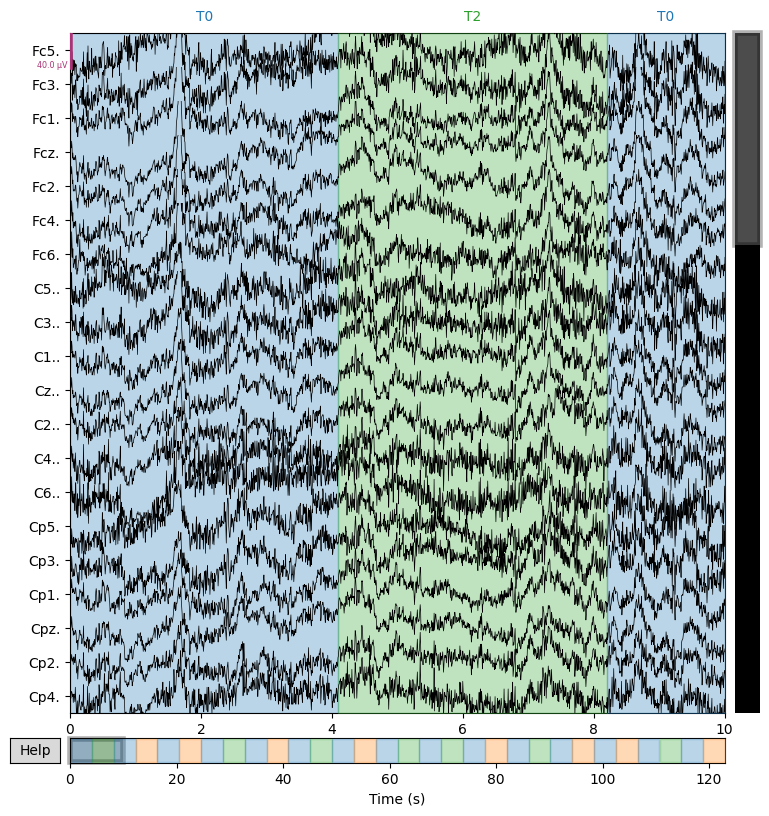

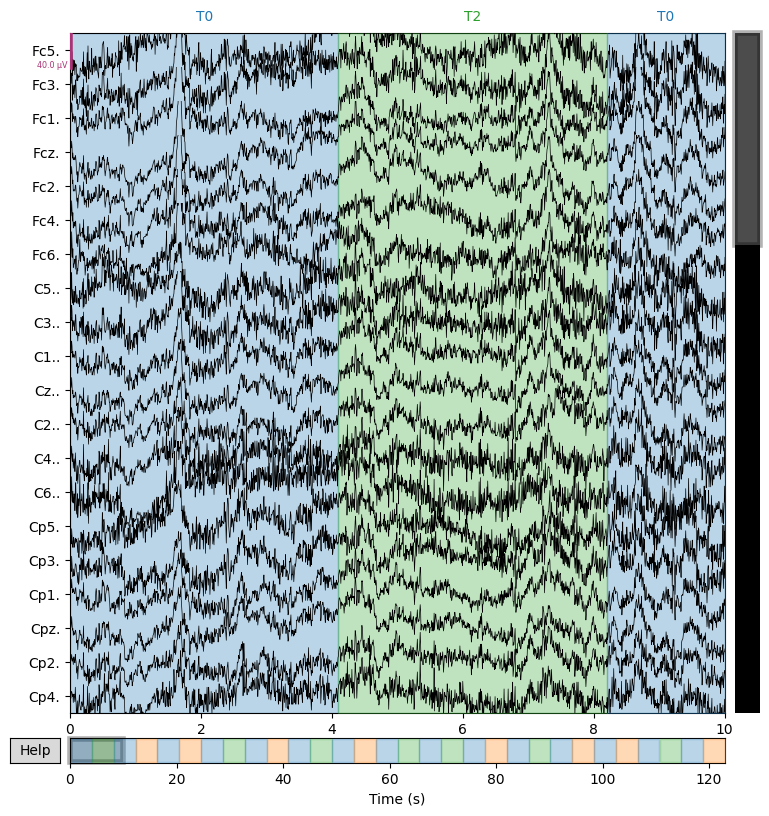

In [ ]:
# Example: Plot raw EEG data
raw.plot()


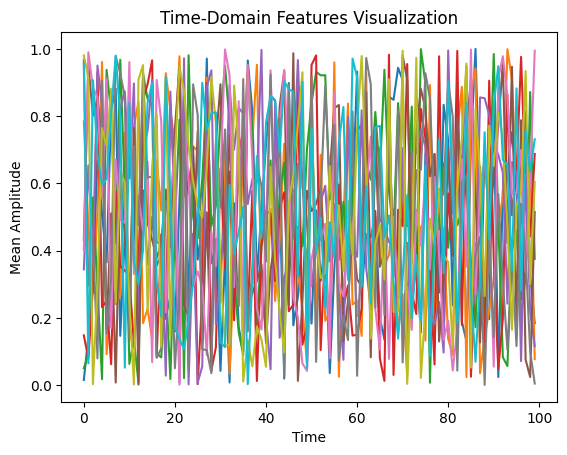

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: mean_per_channel (2D array)
mean_per_channel = np.random.rand(10, 100)  # Example data, replace with your own

# Plotting
plt.plot(mean_per_channel.T)
plt.xlabel('Time')
plt.ylabel('Mean Amplitude')
plt.title('Time-Domain Features Visualization')
plt.show()


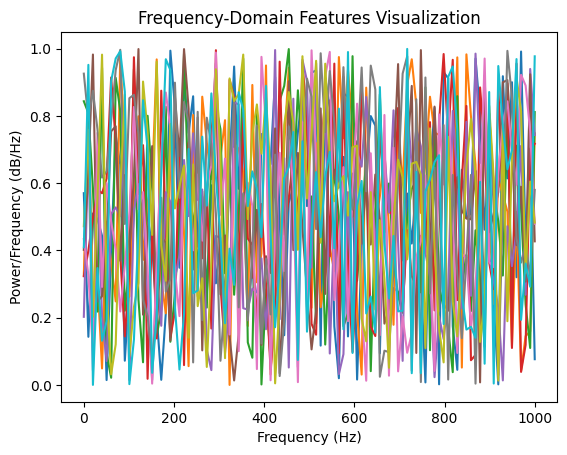

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: frequencies and psd (2D array)
frequencies = np.linspace(0, 1000, 100)  # Example frequency values, replace with your own
psd = np.random.rand(10, 100)  # Example PSD data, replace with your own

# Plotting
plt.plot(frequencies, psd.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Frequency-Domain Features Visualization')
plt.show()


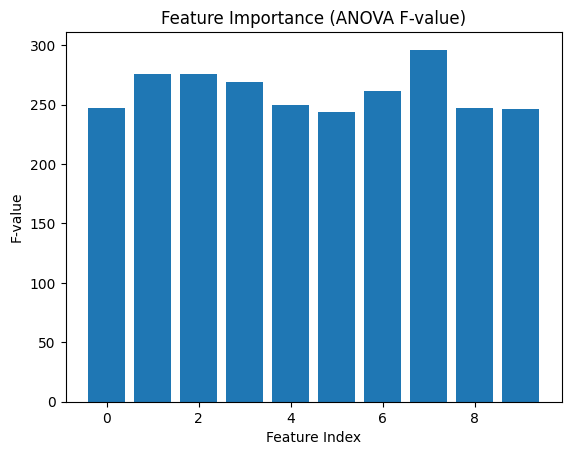

In [ ]:
# Reshape X_train to have two dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Selecting top 10 features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_train_reshaped, y_train)

# Getting the indices of selected features
selected_indices = selector.get_support(indices=True)

# Plotting feature importance (based on ANOVA F-value)
plt.bar(range(len(selected_indices)), selector.scores_[selected_indices])
plt.xlabel('Feature Index')
plt.ylabel('F-value')
plt.title('Feature Importance (ANOVA F-value)')
plt.show()


In [ ]:
# Example: Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.25      0.33         4
           2       0.29      1.00      0.44         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       0.50      1.00      0.67         1
          10       0.83      1.00      0.91         5
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         4
          15       1.00      0.60      0.75         5
          16       1.00      1.00      1.00         1
          17       1.00      0.25      0.40         4
    

In [ ]:
# Load EEG data
raw = mne.io.read_raw_edf(eeg_path, preload=True)

# Create montage with standard electrode positions
montage = mne.channels.make_standard_montage('standard_1020')

# Check for and handle missing channels
missing_channels = set(raw.ch_names) - set(montage.ch_names)
if missing_channels:
    print("Channels missing from the montage:", missing_channels)
    # You can handle missing channels here as needed

# Apply montage to the info object
raw.set_montage(montage, on_missing='ignore')  # or 'warn' depending on your preference

# Perform analysis or obtain data for visualization (e.g., evoked response)
# Code for analysis or obtaining evoked response goes here...


Extracting EDF parameters from /content/drive/MyDrive/Files/S020/S020R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Channels missing from the montage: {'P7..', 'T10.', 'Po4.', 'P2..', 'F4..', 'Af4.', 'Fpz.', 'Af8.', 'Cp5.', 'Fcz.', 'Cp6.', 'Fp1.', 'Afz.', 'Cp3.', 'Fc1.', 'C6..', 'F6..', 'Af7.', 'F2..', 'Ft8.', 'T7..', 'O2..', 'T9..', 'Ft7.', 'Cp1.', 'Fp2.', 'F3..', 'Fz..', 'F1..', 'Po7.', 'Fc6.', 'Cp4.', 'Cz..', 'C2..', 'Poz.', 'Cp2.', 'Af3.', 'F7..', 'P6..', 'Po8.', 'O1..', 'Oz..', 'Iz..', 'Fc4.', 'P3..', 'C3..', 'P4..', 'F5..', 'Fc5.', 'C4..', 'Pz..', 'Po3.', 'C1..', 'T8..', 'Fc2.', 'P5..', 'C5..', 'P8..', 'Cpz.', 'P1..', 'Tp8.', 'Fc3.', 'Tp7.', 'F8..'}


Measurement date,"August 12, 2009 16:15:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,3 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,160.00 Hz
Highpass,0.00 Hz
Lowpass,80.00 Hz


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



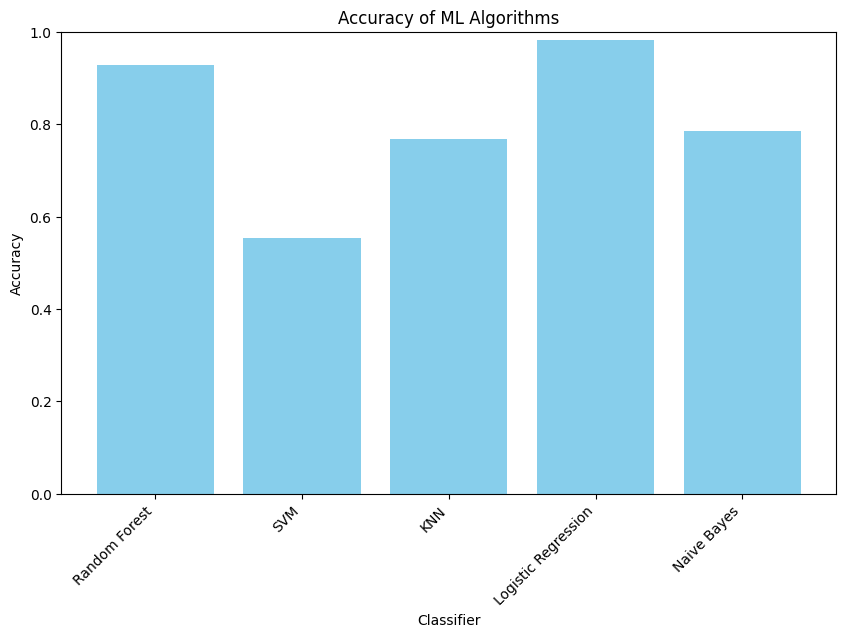

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Separate features and class labels
X = [features[0] for features in training_data]
y = [class_num for _, class_num in training_data]

# Ensure all feature vectors have the same length
max_length = max(len(features) for features in X)
X_flat = [np.pad(features, (0, max_length - len(features))) for features in X]

# Flatten the nested list structure
X_flat = np.array(X_flat)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Reshape X_train to 2D array if it's not already
X_train = np.reshape(X_train, (X_train.shape[0], -1))

# Reshape X_test to 2D array if it's not already
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store accuracy scores
accuracy_scores = {}

# Classification
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of ML Algorithms')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



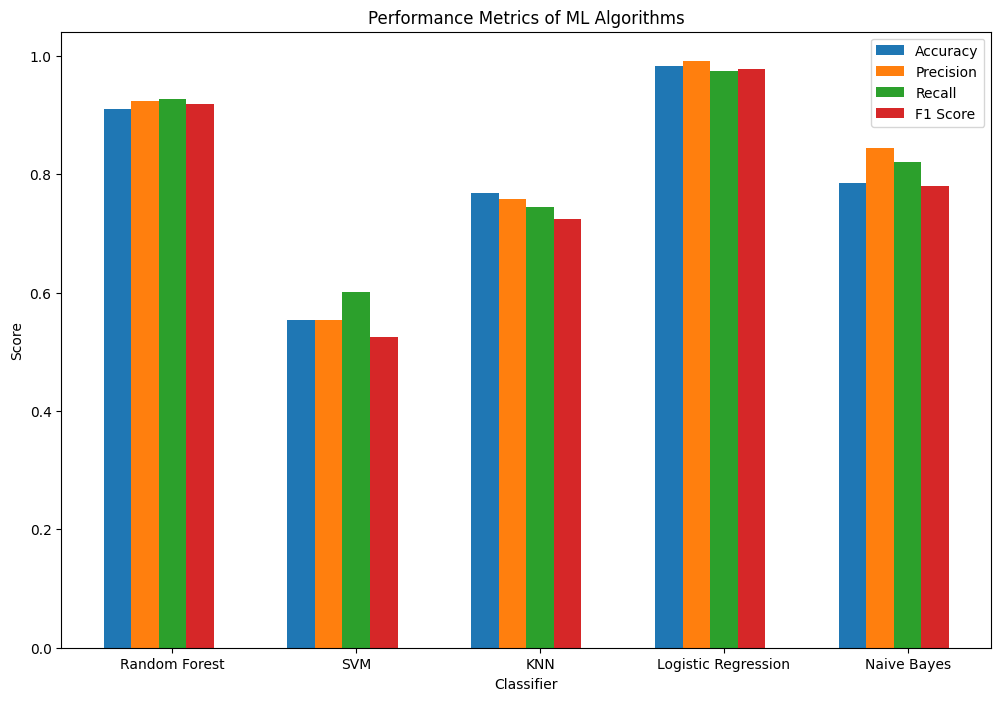

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Separate features and class labels
X = [features[0] for features in training_data]
y = [class_num for _, class_num in training_data]

# Ensure all feature vectors have the same length
max_length = max(len(features) for features in X)
X_flat = [np.pad(features, (0, max_length - len(features))) for features in X]

# Flatten the nested list structure
X_flat = np.array(X_flat)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Flatten the nested list structure for X_train and X_test
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Dictionary to store evaluation metrics
evaluation_metrics = {}

# Classification
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

# Evaluation metrics to collect
metrics_to_collect = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score
}

# Iterate over classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    evaluation_metrics[name] = {}

    # Compute evaluation metrics
    for metric_name, metric_func in metrics_to_collect.items():
        if metric_name == "Accuracy":
            evaluation_metrics[name][metric_name] = metric_func(y_test, y_pred)
        else:
            evaluation_metrics[name][metric_name] = metric_func(y_test, y_pred, average='macro')


# Plotting
plt.figure(figsize=(12, 8))

# Plotting each metric for each classifier
for metric_name in metrics_to_collect.keys():
    values = [evaluation_metrics[classifier][metric_name] for classifier in classifiers.keys()]
    plt.bar(np.arange(len(classifiers)) + 0.15 * list(metrics_to_collect.keys()).index(metric_name), values, width=0.15, label=metric_name)

# Adding labels
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Performance Metrics of ML Algorithms')
plt.xticks(np.arange(len(classifiers)) + 0.15 * len(metrics_to_collect) / 2, classifiers.keys())
plt.legend()
plt.show()
